1387
For n_clusters = 20 The average silhouette_score is : -0.0434183020749161


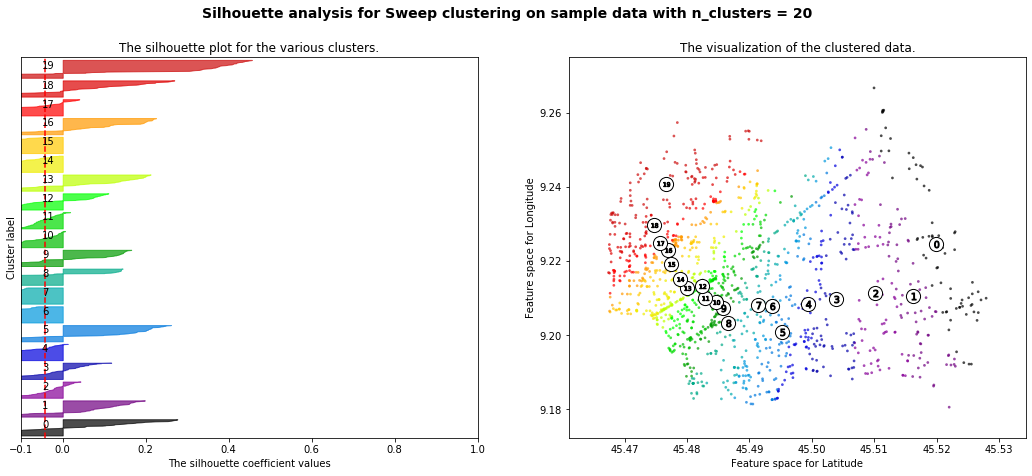

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from importlib import reload

import a2a_clustering
import a2a_validation
import a2a_travellingsalesman

a2a_clustering = reload(a2a_clustering)
a2a_validation = reload(a2a_validation)
a2a_travellingsalesman = reload(a2a_travellingsalesman)

###################
# CLUSTERING STEP #
###################

n_clusters = 20
RANDOM_SEED = 0

PATH = 'output/clustering/'
FILE_PREFIX = PATH + 'sweep_' + str(n_clusters) + '_'

df = pd.read_csv("output/data_preparation/first_visit.20190903.csv",
    parse_dates=['created_at'], date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

print(len(df))

X = a2a_clustering.transform(df, False)
clusterer = a2a_clustering.sweep_clustering(X, n_clusters)

df = df.assign(**{
    'Cluster_labels': clusterer._labels
})

centroid_csv = np.asarray(clusterer.cluster_centers_)
np.savetxt(FILE_PREFIX + "centroids.csv", 
    centroid_csv, 
    header="lat,lng", 
    delimiter=",", 
    comments='')

###################
# VALIDATION STEP #
###################

df = a2a_validation.silhouette(df, clusterer.cluster_centers_, FILE_PREFIX, "Sweep")
df.to_csv(FILE_PREFIX + "clusterized_dataset.csv")
###################
# TSP        STEP #
###################

tsp_solved = a2a_travellingsalesman.tsp(df, FILE_PREFIX)
tsp_solved.to_csv(FILE_PREFIX + 'tsp.csv')

In [9]:
tsp_solved

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,33581.600,33 Km 581.60 m.,1:18:01,2:27:01,4681.20,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,40554.199,40 Km 554.20 m.,1:33:32,2:42:32,5612.80,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,35176.800,35 Km 176.80 m.,1:17:34,2:26:34,4654.00,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,36927.900,36 Km 927.90 m.,1:20:10,2:29:10,4810.20,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,32366.398,32 Km 366.40 m.,1:06:07,2:15:07,3967.00,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,29383.999,29 Km 384.00 m.,1:04:46,2:13:46,3886.70,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,28135.599,28 Km 135.60 m.,1:01:24,2:10:24,3684.50,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,34421.900,34 Km 421.90 m.,1:16:20,2:25:20,4580.90,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,28725.599,28 Km 725.60 m.,1:01:06,2:10:06,3666.80,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,25082.900,25 Km 82.90 m.,0:57:47,2:06:47,3467.60,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
